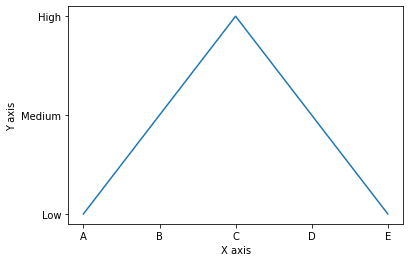

In [7]:
import matplotlib.pyplot as plt

# Define the data to be plotted
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 2, 1]

# Plot the line
plt.plot(x, y)

# Define the locations and labels for x-axis ticks
xticks = [1, 2, 3, 4, 5]
xticklabels = ['A', 'B', 'C', 'D', 'E']
plt.xticks(xticks, xticklabels)

# Define the locations and labels for y-axis ticks
yticks = [1, 2, 3]
yticklabels = ['Low', 'Medium', 'High']
plt.yticks(yticks, yticklabels)

# Add labels to the plot
plt.xlabel('X axis')
plt.ylabel('Y axis')

# Show the plot
plt.show()


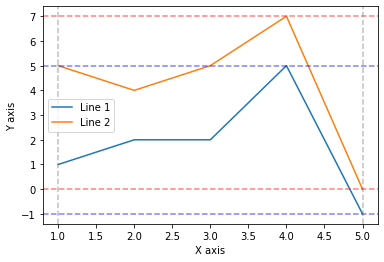

In [6]:
import matplotlib.pyplot as plt

# Define the data to be plotted
x = [1, 2, 3, 4, 5]
y1 = [1, 2, 2, 5, -1]
y2 = [5, 4, 5, 7, 0]

# Find the lowest and highest values
x_min, x_max = min(x), max(x)
y1_min, y1_max = min(y1), max(y1)
y2_min, y2_max = min(y2), max(y2)

# Plot the first line
plt.plot(x, y1, label='Line 1')

# Plot the second line
plt.plot(x, y2, label='Line 2')

# Project the lowest and highest values on the horizontal and vertical axes
plt.axhline(y=y1_min, color='b', linestyle='--', alpha=0.5)
plt.axhline(y=y1_max, color='b', linestyle='--', alpha=0.5)
plt.axhline(y=y2_min, color='r', linestyle='--', alpha=0.5)
plt.axhline(y=y2_max, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=x_min, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=x_max, color='gray', linestyle='--', alpha=0.5)

# Add labels and legend to the plot
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np
import math
import roboticstoolbox as rtb
from roboticstoolbox import ET, ETS, ERobot
from sympy import Matrix, nsimplify
from spatialmath.base import *
from spatialmath import SE3

pi = math.pi
#d*Rz*a*Rx

Base = SE3(-0.116,0,0)
#rtb.robot.RevoluteDH(a=-0.116),
link0 = rtb.robot.RevoluteDH(d=0.0294, alpha=pi/2, qlim=np.array([-pi/2,pi]),m=0.33, r=[-8.2*1e-3,-1.6*1e-4,-7.02*1e-3], I=[2.05*1e-3,1.58*1e-3,7.1*1e-4], Jm=0.0002)
link1 = rtb.robot.RevoluteDH(a=0.23, qlim=[0,pi], m=0.201, r=[1.64*1e-2,-2.96*1e-3,-1.12*1e-6], I=[2.45*1e-3,2.27*1e-3,4.55*1e-4], Jm=0.0002)# alpha=pi),
link2 = rtb.robot.RevoluteDH(d=-0.00286, a=0,alpha=-pi/2, qlim=[0,pi],flip=True, m=0.279, r=[0.0,7.76*1e-3,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4], Jm=0.0002)
link3 = rtb.robot.RevoluteDH(d=0.17213,a=0.0019, alpha=pi/2, qlim=[0,pi], m=0.222, r=[7.76*1e-3,0.0,0.0], I=[1.28*1e-3,1.09*1e-3,7.06*1e-4], Jm= 3.3*1e-5)
link4 = rtb.robot.RevoluteDH(a=0.0438, alpha=-pi/2, qlim=[-pi/2,pi], m=0.099, r=[6.54*1e-3,0.0,-2.08*1e-4], I=[6.05*1e-4,4.5*1e-4,1.96*1e-4], Jm= 3.3*1e-5)#,
link5 = rtb.robot.RevoluteDH(offset=-pi/2, alpha=0, qlim=[-pi,pi],m=0.09, r=[-1.045*1e-2,1.37*1e-4,-9.97*1e-5], I=[5.056*1e-3,3.1*1e-3,1.96*1e-3], Jm= 3.3*1e-5)

robot = rtb.robot.DHRobot([link0,link1,link2,link3,link4,link5],name="PROCaN", manufacturer="Vitor Domingues", base = Base)
robot.addconfiguration_attr("qf", [0.0, 0.0, 1.57, 0, 0, 0])
robot.addconfiguration_attr("q30", [0.0, pi/6, pi/3, 0, 0, 0])
robot.addconfiguration_attr("q05", [0.0, 0.5, 0.5, 0.5, 0, 0])
#print(robot)

In [ ]:
import math

def tail_rotor_info(mass, main_rotor_velocity):
    # Constants
    main_rotor_diameter = 8.0  # meters
    tail_rotor_diameter = 1.5  # meters
    distance_to_tail_rotor = 5.0  # meters
    tail_rotor_efficiency = 0.7  # dimensionless
    air_density = 1.225  # kg/m^3

    # Calculate main rotor thrust
    main_rotor_thrust = (mass*9.81) / math.cos(math.atan(distance_to_tail_rotor/main_rotor_diameter))
    # Calculate tail rotor thrust
    tail_rotor_thrust = main_rotor_thrust * (tail_rotor_diameter/main_rotor_diameter) * tail_rotor_efficiency
    # Calculate tail rotor velocity
    tail_rotor_velocity = math.sqrt((2*tail_rotor_thrust) / (air_density*math.pi*(tail_rotor_diameter/2)**2))

    return distance_to_tail_rotor, tail_rotor_velocity

# Example usage
mass = 1000  # kg
main_rotor_velocity = 100  # m/s
distance, velocity = tail_rotor_info(mass, main_rotor_velocity)
print("Distance to tail rotor: ", distance, " meters")
print("Tail rotor velocity: ", velocity, " m/s")


In [ ]:
#COMPUTANDO CONFIGURAÇÃO DE TORQUE MÁXIMO:
import numpy as np
import matplotlib.pyplot as plt
import roboticstoolbox as rtb

# Define the start and end configurations
q0 = np.array([0, 0, np.pi/2, 0, 0, 0])
q1 = np.array([0, np.pi, -np.pi/2, 0, np.pi/2, 0])
#torque = []
# Create a trajectory from the start to end configurations
traj = rtb.jtraj(q0, q1,100)
qtraj = []
qdtraj = []
# Calculate the torqueeration at each configuration
torque = np.zeros((len(traj), 6))
for i in range(len(traj)):
    q = traj.q[i, :]
    qtraj.append(q)
    
    torque[i, :] = robot.rne(q,4.74+np.zeros((6,)),1+np.zeros((6,)))

robot.plot(traj.q, backend='pyplot', movie='procan.gif')
s = 1

max_values = np.amax(torque, axis=0)
max_linhas = np.argmax(torque, axis=0)
min_values = np.amin(torque, axis=0)
min_linhas = np.argmin(torque, axis=0)
print(max_values,max_linhas)

plt.scatter(range(100), torque[:, 0], s=s,c='r')
plt.scatter(range(100), torque[:, 1], s=s,c='g')
plt.scatter(range(100), torque[:, 2], s=s,c='b')
plt.scatter(range(100), torque[:, 3], s=s,c='c')
plt.scatter(range(100), torque[:, 4], s=s,c='m')
plt.scatter(range(100), torque[:, 5], s=s,c='y')
plt.scatter(max_linhas[0], max_values[0], s=5,c='r')
plt.scatter(max_linhas[1], max_values[1], s=5,c='g')
plt.scatter(max_linhas[2], max_values[2], s=5,c='b')
plt.scatter(max_linhas[3], max_values[3], s=5,c='c')
plt.scatter(max_linhas[4], max_values[4], s=5,c='m')
plt.scatter(max_linhas[5], max_values[5], s=5,c='y')
plt.scatter(min_linhas[0], min_values[0], s=5,c='r')
plt.scatter(min_linhas[1], min_values[1], s=5,c='g')
plt.scatter(min_linhas[2], min_values[2], s=5,c='b')
plt.scatter(min_linhas[3], min_values[3], s=5,c='c')
plt.scatter(min_linhas[4], min_values[4], s=5,c='m')
plt.scatter(min_linhas[5], min_values[5], s=5,c='y')

#DECIDIR ENTRE AS OPÇÕES DE CONTROLE: CONSTANT,S-SHAPED, 
plt.xlabel('Tempo (s)')
plt.ylabel('Torque (N.m)')
plt.title('Torque na rota braço recolhido-estendido')
plt.show()

In [72]:

'''
The coupling inertia matrix between two bodies can be found by considering their relative position, orientation, and masses. It is calculated as the sum of the individual body's inertia matrices,
expressed in the same reference frame, with additional cross-terms representing the coupling between the two bodies. These cross-terms arise from the interaction between the linear and angular velocity of each body.
The equation for the coupling inertia matrix between two bodies, body 1 and body 2, is given by:

M_c = M_1 + M_2 + [r_1]_x * I_1 * [r_1]_x^T + [r_2]_x * I_2 * [r_2]_x^T

where M_1 and M_2 are the masses of body 1 and body 2, respectively, I_1 and I_2 are their individual inertia matrices, and [r_1]_x and [r_2]_x are the skew-symmetric matrices representing the cross-products of their center of mass positions with respect to a common reference frame.
'''
import numpy as np
import roboticstoolbox as rtb
from roboticstoolbox import DHRobot, SerialLink
pi = np.pi

d = 0.0
a = -0.116
alpha = 0.0
theta = 0.0

lBase = rtb.robot.RevoluteDH(a = a, d=0.0, alpha=0.0, qlim=np.array([-pi/2,pi]),m=2.273,r=[2.727*1e-6,-4.59*1e-6,3.219*1e-6], I=[2.447*1e-2,1.598*1e-2,1.197*1e-2,3.126*1e-5,6.507*1e-4,7.835*1e-4])
base = DHRobot([lBase])

plataforma = SerialLink([base])

q = np.array([pi])
qd = np.array([4.7])
qdd = np.array([0.0])

grav = np.array([0,0,0])
tau = base.rne(q,qd,qdd,grav)
J = base.jacobe(q)
M = base.inertia([0])
#base.r
#In = base[0].I
#c = np.linalg.inv(M)*In

base[0].dyn()

'm     =       2.3 \nr     =   2.7e-06 -4.6e-06  3.2e-06 \n        |    0.024  3.1e-05  0.00078 | \nI     = |  3.1e-05    0.016  0.00065 | \n        |  0.00078  0.00065    0.012 | \nJm    =         0 \nB     =         0 \nTc    =         0(+)        0(-) \nG     =         0 \nqlim  =      -1.6 to      3.1'

In [1]:
import numpy as np
import roboticstoolbox as rtb
from roboticstoolbox import DHRobot, SerialLink

def compute_coupling_inertia_matrix(robot, base_inertia, link_inertias):
    '''
    Computes the coupling inertia matrix between a robot manipulator and its floating base
    
    Parameters:
    -----------
    robot : object
        Instance of the robot model
    base_inertia : numpy array (3x3)
        Inertia matrix of the floating base
    link_inertias : list of numpy arrays (3x3)
        List of inertia matrices of each link of the manipulator
        
    Returns:
    --------
    coupling_inertia : numpy array (6x6)
        Coupling inertia matrix
    '''
    n_dof = robot.n

    #Transforma as inércias de cada elo de sua referência para a referência da base
    T_link_to_base = [link.T for link in robot.links()]
    link_inertias_base = [np.dot(np.dot(T, I), T.T) for T, I in zip(T_link_to_base, link_inertias)]

    #Computa a matriz de inércia de acoplamento (Base-Manipulador)
    coupling_inertia = np.zeros((6,6))
    coupling_inertia[:3,:3] = base_inertia
    for i in range(n_dof):
        r = np.dot(T_link_to_base[i][:3,:3], robot.links()[i].r)
        coupling_inertia[:3,3:] += np.dot(np.dot(r, link_inertias_base[i]), r.T)
        coupling_inertia[3:,:3] += np.dot(np.dot(r, link_inertias_base[i]), r.T)
        coupling_inertia[3:,3:] += link_inertias_base[i]

    return coupling_inertia


In [3]:
import numpy as np
import roboticstoolbox as rtb

dh = [[-0.1,0.2,0.0,0.0]]
pi = np.pi

link0 = rtb.robot.RevoluteDH(d=0.0294, alpha=0.0, qlim=np.array([-pi/2,pi]),m=0.33, r=[-8.2*1e-3,-1.6*1e-4,-7.02*1e-3], I=[2.05*1e-3,1.58*1e-3,7.1*1e-4])
link1 = rtb.robot.RevoluteDH(a=0.23, qlim=[0,pi], m=0.201, r=[1.64*1e-2,-2.96*1e-3,-1.12*1e-6], I=[2.45*1e-3,2.27*1e-3,4.55*1e-4])

robot = rtb.robot.DHRobot([link0,link1],name="PROCaN", manufacturer="Vitor Domingues", gravity=[0,0,0])

q = np.zeros(robot.n)

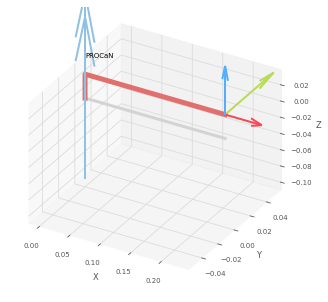

PyPlot3D backend, t = 0.05, scene:
  PROCaN

<Figure size 432x288 with 0 Axes>

In [7]:
robot.plot(q)

In [51]:
robot[0].A(0)*robot[1].r

array([[ 0.0164    ],
       [-0.00296   ],
       [ 0.02939888]])

In [ ]:
compute_coupling_inertia_matrix(robot, robot[0].I, robot[1].I)

In [5]:
robot.inertia([0,0])

array([[ 1.60917567e-02, -6.66355199e-10],
       [-6.66355199e-10,  1.26600660e-02]])

In [35]:
T_link_to_base = [robot[i].A(0) for i in range(robot.n)]
T = np.dot(robot[0].A(0),robot[1].A(0))
np.dot(T[:3,:3],robot[0].I)


array([[ 2.05000000e-03,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  9.67470971e-20, -7.10000000e-04],
       [ 0.00000000e+00,  1.58000000e-03,  4.34749614e-20]])

In [37]:
robot.inertia([0,0])

array([[ 1.60917567e-02, -6.66355199e-10],
       [-6.66355199e-10,  1.26600660e-02]])

In [20]:
#posicao do CM do elo em relacao a base
tr = robot.A(1,[0,0])
tr.t[0]

0.23

In [21]:
def cdm(robot,n,q): #Depende do modelo, nº de juntas e da configuração do robô
    #Inicia listas de massas e coordenadas dos centros de massa de cada elo
    m = []
    x = []
    y = []
    z = []
    M = 0
    
    #extrai e redistribui massas e coordenadas às listas (relativas à junta j0)
    for i in range(n):
        tr = robot.A(i,q)
        M += robot[i].m
        m.append(robot[i].m)
        x.append(tr.t[0]+robot[i].r[0])
        y.append(tr.t[1]+robot[i].r[1])
        z.append(tr.t[2]+robot[i].r[2])

    xcm,ycm,zcm = 0,0,0

    #Posição do CM = 1/M * somatório m_i *p_i
    for i in range(n):
        xcm += m[i]*x[i]
        ycm += m[i]*y[i]
        zcm += m[i]*z[i]
    xcm = xcm/M
    ycm = ycm/M
    zcm = zcm/M

    return(xcm,ycm,zcm)

In [23]:
cdm(robot,robot.n,[pi,0])

(0.08706214689265537, 0.0, 0.0294)

In [6]:
#CALCULAR CDM DO EFETUADOR FINAL EM RELAÇÃO A Q0 E À BASE SATELITAL
q = np.zeros(robot.n)
tref = robot.A(robot.n-1,q)
cdm_EF = tref.t+robot[robot.n-1].r
cdm_EF

array([ 0.2464    , -0.00296   ,  0.02939888])